In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd

In [10]:
tf.__version__

'2.1.0'

In [11]:
keras.__version__

'2.2.4-tf'

## Building a simple MLP for classification problem

In [12]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [13]:
X_train_full.shape

(60000, 28, 28)

In [14]:
X_train_full.dtype

dtype('uint8')

In [15]:
# scale features pixel intensities 0 to 255
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [16]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

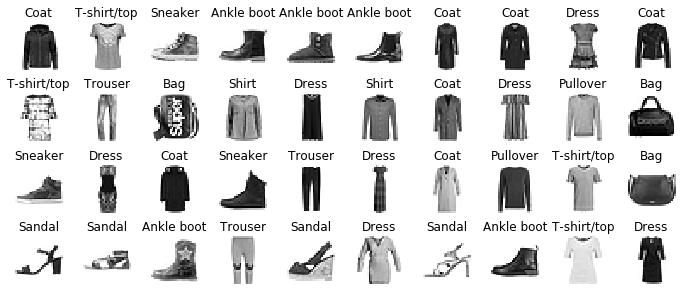

In [17]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [18]:
class_names[y_train[0]]

'Coat'

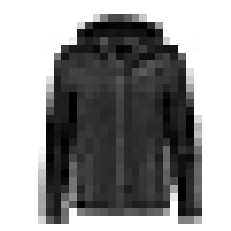

In [19]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

# Creating the model

In [20]:
model = keras.models.Sequential()

In [21]:
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Similaire

In [22]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.layers

In [24]:
hidden1 = model.layers[1]

In [25]:
hidden1.name

'dense_3'

In [27]:
model.get_layer('dense_3') is hidden1

True

In [28]:
weights, biases = hidden1.get_weights()

In [29]:
weights

array([[ 0.04690405, -0.04514444, -0.01362551, ..., -0.06085352,
        -0.06475659,  0.05649413],
       [-0.04031773,  0.06183726,  0.0526735 , ..., -0.0742455 ,
        -0.06252122,  0.06317964],
       [-0.07141963,  0.02740433,  0.00658911, ...,  0.01896454,
        -0.06114722,  0.00384099],
       ...,
       [ 0.02013084, -0.01554845,  0.00616011, ...,  0.02722456,
         0.03215412, -0.05628205],
       [-0.05315097,  0.01941398,  0.00307952, ..., -0.00858025,
        -0.01682663,  0.06048398],
       [-0.01671491,  0.02370487, -0.00281236, ..., -0.05152252,
         0.04609318, -0.03934027]], dtype=float32)

In [30]:
weights.shape

(784, 300)

Biases are initialized to zeros, we can set kernel_initializer for use different initialization method

In [31]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [32]:
biases.shape

(300,)

In [33]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [34]:
A = y_train[0]

Sparse categorical crossentropy vs categorical crossentropy

It depends of label: 

Sparse label > target class index 0 to 9 in this case

Categorical label > target class one-hot vector [0,0,0,0,0,0,1,0,0,0]

In [35]:
A

4

Convert sparse label

In [36]:
A = keras.utils.to_categorical(A, 10)

In [37]:
A

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [38]:
A = np.argmax(A)

In [39]:
A

4

In [40]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 100us/sample - loss: 0.7321 - accuracy: 0.7595 - val_loss: 0.5129 - val_accuracy: 0.8320
Epoch 2/30
55000/55000 [==============================] - 5s 94us/sample - loss: 0.4959 - accuracy: 0.8271 - val_loss: 0.4599 - val_accuracy: 0.8436
Epoch 3/30
55000/55000 [==============================] - 6s 105us/sample - loss: 0.4474 - accuracy: 0.8424 - val_loss: 0.4084 - val_accuracy: 0.8604
Epoch 4/30
55000/55000 [==============================] - 5s 86us/sample - loss: 0.4199 - accuracy: 0.8524 - val_loss: 0.4207 - val_accuracy: 0.8554
Epoch 5/30
55000/55000 [==============================] - 5s 84us/sample - loss: 0.3988 - accuracy: 0.8602 - val_loss: 0.3932 - val_accuracy: 0.8622
Epoch 6/30
55000/55000 [==============================] - 5s 82us/sample - loss: 0.3821 - accuracy: 0.8660 - val_loss: 0.3648 - val_accuracy: 0.8788
Epoch 7/30
55000/55000 [==============================]

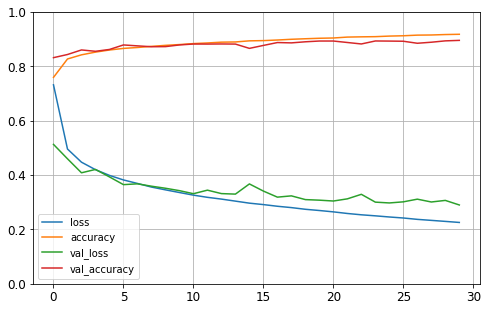

In [41]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [42]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [43]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.3255 - accuracy: 0.8857


[0.325472375535965, 0.8857]

Testing on new instance

In [44]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [45]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [46]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [47]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## Building a simple MLP for regression problem

In [48]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
housing = fetch_california_housing()

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_valid_sc = sc.transform(X_valid)
X_test_sc = sc.transform(X_test)

In [51]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train_sc.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(optimizer="sgd", loss="mean_squared_error")
history = model.fit(X_train_sc, y_train,
                    validation_data=(X_valid_sc, y_valid), epochs=20)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 55us/sample - loss: 1.1724 - val_loss: 0.8398
Epoch 2/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.5768 - val_loss: 0.5562
Epoch 3/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4828 - val_loss: 0.5141
Epoch 4/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4574 - val_loss: 0.4997
Epoch 5/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4452 - val_loss: 0.4845
Epoch 6/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4387 - val_loss: 0.4707
Epoch 7/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4291 - val_loss: 0.4728
Epoch 8/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4265 - val_loss: 0.4621
Epoch 9/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4189 - val_l

In [52]:
mse_test = model.evaluate(X_test_sc, y_test)
X_new = X_test_sc[:3]
y_pred = model.predict(X_new)

5160/5160 [==============================] - 0s 16us/sample - loss: 0.4022


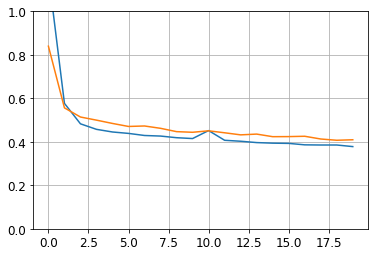

In [53]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [54]:
y_pred

array([[1.8723559],
       [1.0487727],
       [2.4959385]], dtype=float32)

## Building Complex Models Using the Functional API

In [55]:
input_ = keras.layers.Input(shape=X_train_sc.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [56]:
model.compile(optimizer="sgd", loss="mean_squared_error")
history = model.fit(X_train_sc, y_train,
                    validation_data=(X_valid_sc, y_valid), epochs=20)


Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 65us/sample - loss: 0.9507 - val_loss: 0.5895
Epoch 2/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.5332 - val_loss: 0.5128
Epoch 3/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4658 - val_loss: 0.4849
Epoch 4/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4299 - val_loss: 0.4570
Epoch 5/20
11610/11610 [==============================] - 0s 34us/sample - loss: 0.4528 - val_loss: 0.4547
Epoch 6/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4093 - val_loss: 0.4360
Epoch 7/20
11610/11610 [==============================] - 0s 34us/sample - loss: 0.4034 - val_loss: 0.4248
Epoch 8/20
11610/11610 [==============================] - 0s 34us/sample - loss: 0.4477 - val_loss: 0.4105
Epoch 9/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.3778 - val_l

In [57]:
mse_test = model.evaluate(X_test_sc, y_test)
X_new = X_test_sc[:3]
y_pred = model.predict(X_new)

5160/5160 [==============================] - 0s 16us/sample - loss: 0.3631


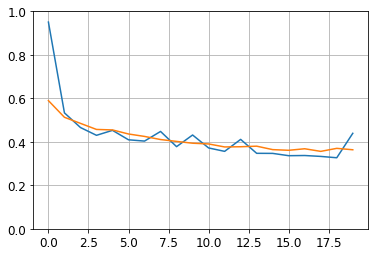

In [58]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [59]:
y_pred

array([[2.0855343],
       [1.141564 ],
       [2.7132635]], dtype=float32)

# Send subset through deep path, and another through short path

In [60]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [61]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [62]:
X_train_A, X_train_B = X_train_sc[:, :5], X_train_sc[:, 2:]
X_valid_A, X_valid_B = X_valid_sc[:, :5], X_valid_sc[:, 2:]
X_test_A, X_test_B = X_test_sc[:, :5], X_test_sc[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 61us/sample - loss: 1.8726 - val_loss: 1.0292
Epoch 2/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.8326 - val_loss: 0.7897
Epoch 3/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.6764 - val_loss: 0.6994
Epoch 4/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.6132 - val_loss: 0.6661
Epoch 5/20
11610/11610 [==============================] - 0s 34us/sample - loss: 0.5761 - val_loss: 0.6152
Epoch 6/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.5507 - val_loss: 0.5914
Epoch 7/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.5317 - val_loss: 0.5836
Epoch 8/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.5176 - val_loss: 0.5628
Epoch 9/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.5090 - val_l

In [63]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [64]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [65]:
history = model.fit(
[X_train_A, X_train_B], [y_train, y_train], epochs=20,
validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 105us/sample - loss: 0.9473 - main_output_loss: 0.8583 - aux_output_loss: 1.7460 - val_loss: 0.6413 - val_main_output_loss: 0.5759 - val_aux_output_loss: 1.2302
Epoch 2/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.5608 - main_output_loss: 0.5045 - aux_output_loss: 1.0692 - val_loss: 0.5851 - val_main_output_loss: 0.5346 - val_aux_output_loss: 1.0403
Epoch 3/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.5341 - main_output_loss: 0.4898 - aux_output_loss: 0.9375 - val_loss: 0.5500 - val_main_output_loss: 0.5106 - val_aux_output_loss: 0.9054
Epoch 4/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4995 - main_output_loss: 0.4626 - aux_output_loss: 0.8309 - val_loss: 0.5097 - val_main_output_loss: 0.4760 - val_aux_output_loss: 0.8137
Epoch 5/20
11610/11610 [==============================] - 0s 39us/

In [66]:
total_loss, main_loss, aux_loss = model.evaluate(
[X_test_A, X_test_B], [y_test, y_test])

5160/5160 [==============================] - 0s 21us/sample - loss: 0.3864 - main_output_loss: 0.3719 - aux_output_loss: 0.5010


In [67]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

# Using the Subclassing API to build Dynamic Models

In [68]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
model = WideAndDeepModel()

## Saving and Restoring a Model

In [69]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train_sc.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(optimizer="sgd", loss="mean_squared_error")
history = model.fit(X_train_sc, y_train,
                    validation_data=(X_valid_sc, y_valid), epochs=20)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 55us/sample - loss: 0.9705 - val_loss: 0.8136
Epoch 2/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.5269 - val_loss: 0.5793
Epoch 3/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4702 - val_loss: 0.5030
Epoch 4/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4537 - val_loss: 0.4892
Epoch 5/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4386 - val_loss: 0.4708
Epoch 6/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4304 - val_loss: 0.4663
Epoch 7/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4240 - val_loss: 0.4568
Epoch 8/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4156 - val_loss: 0.4511
Epoch 9/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4115 - val_l

In [70]:
model.save("my_keras_model.h5")

In [71]:
model = keras.models.load_model("my_keras_model.h5")

## Using Callbacks

In [72]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train_sc.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(optimizer="sgd", loss="mean_squared_error")
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train_sc, y_train, epochs=10, callbacks=[checkpoint_cb])

Train on 11610 samples
Epoch 1/10
11610/11610 [==============================] - 1s 45us/sample - loss: 0.8150
Epoch 2/10
11610/11610 [==============================] - 0s 29us/sample - loss: 0.7022
Epoch 3/10
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4799
Epoch 4/10
11610/11610 [==============================] - 0s 27us/sample - loss: 0.4576
Epoch 5/10
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4451
Epoch 6/10
11610/11610 [==============================] - 0s 26us/sample - loss: 0.4384
Epoch 7/10
11610/11610 [==============================] - 0s 25us/sample - loss: 0.4294
Epoch 8/10
11610/11610 [==============================] - 0s 25us/sample - loss: 0.4235
Epoch 9/10
11610/11610 [==============================] - 0s 27us/sample - loss: 0.4221
Epoch 10/10
11610/11610 [==============================] - 0s 27us/sample - loss: 0.4128


If we use validation set during training, save_best_only=True will only save the model when its performance on the validation set is the best so far

In [73]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
save_best_only=True)

history = model.fit(X_train_sc, y_train, epochs=10,
                    validation_data=(X_valid_sc, y_valid),
                    callbacks=[checkpoint_cb])

model = keras.models.load_model("my_keras_model.h5") # roll back to best model

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 0s 38us/sample - loss: 0.4137 - val_loss: 0.4436
Epoch 2/10
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4065 - val_loss: 0.4334
Epoch 3/10
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4032 - val_loss: 0.4364
Epoch 4/10
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4118 - val_loss: 0.4412
Epoch 5/10
11610/11610 [==============================] - 0s 32us/sample - loss: 0.3935 - val_loss: 0.4263
Epoch 6/10
11610/11610 [==============================] - 0s 32us/sample - loss: 0.3903 - val_loss: 0.4236
Epoch 7/10
11610/11610 [==============================] - 0s 31us/sample - loss: 0.3952 - val_loss: 0.4250
Epoch 8/10
11610/11610 [==============================] - 0s 31us/sample - loss: 0.3936 - val_loss: 0.4212
Epoch 9/10
11610/11610 [==============================] - 0s 33us/sample - loss: 0.3852 - val_l

EarlyStopping will interrupt training when it measures no progress on the validation set for a number of epochs (defined by the patience argument)

In [74]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train_sc, y_train, epochs=100,
                    validation_data=(X_valid_sc, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 45us/sample - loss: 0.3786 - val_loss: 0.4158
Epoch 2/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.3834 - val_loss: 0.4058
Epoch 3/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4205 - val_loss: 0.4119
Epoch 4/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.3917 - val_loss: 0.4069
Epoch 5/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.3805 - val_loss: 0.4126
Epoch 6/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.3695 - val_loss: 0.4081
Epoch 7/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.3640 - val_loss: 0.3955
Epoch 8/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.3616 - val_loss: 0.3983
Epoch 9/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.359

In [75]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

## Using TensorBoard for Visualization

In [76]:
import os

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

In [77]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train_sc, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 0s 42us/sample - loss: 0.3136 - val_loss: 13402.6182
Epoch 2/30
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3115 - val_loss: 33261.4771
Epoch 3/30
11610/11610 [==============================] - 0s 39us/sample - loss: 0.3124 - val_loss: 12427.6404
Epoch 4/30
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3121 - val_loss: 13500.5234
Epoch 5/30
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3104 - val_loss: 17578.2785
Epoch 6/30
11610/11610 [==============================] - 0s 39us/sample - loss: 0.3130 - val_loss: 14464.0698
Epoch 7/30
11610/11610 [==============================] - 0s 38us/sample - loss: 0.3108 - val_loss: 21643.9631
Epoch 8/30
11610/11610 [==============================] - 0s 39us/sample - loss: 0.3116 - val_loss: 39008.0647
Epoch 9/30
11610/11610 [==============================] - 0s 38

In [80]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 6376.

## Fine-Tuning Neural Network Hyperparameters

In [85]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [91]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [92]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [93]:
keras_reg.fit(X_train_sc, y_train, epochs=100,
              validation_data=(X_valid_sc, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

mse_test = keras_reg.score(X_test_sc, y_test)
X_new = X_test_sc[:3]
y_pred = keras_reg.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 55us/sample - loss: 1.1792 - val_loss: 0.7847
Epoch 2/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.6617 - val_loss: 0.6789
Epoch 3/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.5720 - val_loss: 0.6081
Epoch 4/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.5256 - val_loss: 0.5713
Epoch 5/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.4956 - val_loss: 0.5468
Epoch 6/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4812 - val_loss: 0.5309
Epoch 7/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.4704 - val_loss: 0.5202
Epoch 8/100
11610/11610 [==============================] - 0s 38us/sample - loss: 0.4633 - val_loss: 0.5102
Epoch 9/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.457

Epoch 76/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.3639 - val_loss: 0.4032
Epoch 77/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.3647 - val_loss: 0.3989
Epoch 78/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.3630 - val_loss: 0.3997
Epoch 79/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.3625 - val_loss: 0.3990
Epoch 80/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.3615 - val_loss: 0.3982
Epoch 81/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3610 - val_loss: 0.3980
Epoch 82/100
11610/11610 [==============================] - 0s 32us/sample - loss: 0.3599 - val_loss: 0.4032
Epoch 83/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3601 - val_loss: 0.3943
Epoch 84/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.3601 - val_loss: 0.3969
Epoch 85/100
11610/

In [94]:
mse_test

-0.38241735953231193

In [95]:
y_pred

array([1.9921207, 1.1273474, 2.3716564], dtype=float32)

In [97]:
y_test[:3]

array([2.042, 1.938, 2.905])

In [90]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)

rnd_search_cv.fit(X_train_sc, y_train, epochs=100,
                  validation_data=(X_valid_sc, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 64us/sample - loss: 3.1647 - val_loss: 1.4850
Epoch 2/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.9474 - val_loss: 0.7608
Epoch 3/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.6023 - val_loss: 0.6011
Epoch 4/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5361 - val_loss: 0.5671
Epoch 5/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.5240 - val_loss: 0.5669
Epoch 6/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5196 - val_loss: 0.5603
Epoch 7/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5200 - val_loss: 0.5603
Epoch 8/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5200 - val_loss: 0.5664
Epoch 9/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.5196 - val_loss: 0.572

7740/7740 [==============================] - 1s 91us/sample - loss: 3.0723 - val_loss: 1.5784
Epoch 2/100
7740/7740 [==============================] - 0s 33us/sample - loss: 1.0636 - val_loss: 0.8149
Epoch 3/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.6691 - val_loss: 0.6614
Epoch 4/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5823 - val_loss: 0.6278
Epoch 5/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.5596 - val_loss: 0.6153
Epoch 6/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.5506 - val_loss: 0.6106
Epoch 7/100
7740/7740 [==============================] - 0s 32us/sample - loss: 0.5455 - val_loss: 0.6073
Epoch 8/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.5417 - val_loss: 0.6026
Epoch 9/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.5385 - val_loss: 0.6018
Epoch 10/100
7740/7740 [==============================] - 

Epoch 78/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.5095 - val_loss: 0.5535
Epoch 79/100
7740/7740 [==============================] - 0s 32us/sample - loss: 0.5096 - val_loss: 0.5536
Epoch 80/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5095 - val_loss: 0.5548
Epoch 81/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.5095 - val_loss: 0.5541
Epoch 82/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.5095 - val_loss: 0.5527
Epoch 83/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.5095 - val_loss: 0.5540
Epoch 84/100
7740/7740 [==============================] - 0s 32us/sample - loss: 0.5095 - val_loss: 0.5538
Epoch 85/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.5095 - val_loss: 0.5541
Epoch 86/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5095 - val_loss: 0.5552
Epoch 87/100
7740/7740 [=============

7740/7740 [==============================] - 0s 36us/sample - loss: 0.8252 - val_loss: 0.8183
Epoch 4/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.7512 - val_loss: 0.7733
Epoch 5/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.7135 - val_loss: 0.7435
Epoch 6/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.6868 - val_loss: 0.7206
Epoch 7/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.6652 - val_loss: 0.7019
Epoch 8/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.6463 - val_loss: 0.6853
Epoch 9/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.6303 - val_loss: 0.6705
Epoch 10/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.6152 - val_loss: 0.6561
Epoch 11/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.6020 - val_loss: 0.6443
Epoch 12/100
7740/7740 [==============================] 

7740/7740 [==============================] - 0s 42us/sample - loss: 0.4056 - val_loss: 0.4424
Epoch 80/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.4046 - val_loss: 0.4422
Epoch 81/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4038 - val_loss: 0.4406
Epoch 82/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4030 - val_loss: 0.4390
Epoch 83/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4022 - val_loss: 0.4400
Epoch 84/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4015 - val_loss: 0.4370
Epoch 85/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4007 - val_loss: 0.4355
Epoch 86/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3997 - val_loss: 0.4366
Epoch 87/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.3990 - val_loss: 0.4362
Epoch 88/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 37us/sample - loss: 0.4180 - val_loss: 0.4713
Epoch 55/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4168 - val_loss: 0.4697
Epoch 56/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4157 - val_loss: 0.4683
Epoch 57/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4147 - val_loss: 0.4672
Epoch 58/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.4137 - val_loss: 0.4659
Epoch 59/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.4128 - val_loss: 0.4647
Epoch 60/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.4116 - val_loss: 0.4631
Epoch 61/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4109 - val_loss: 0.4630
Epoch 62/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4099 - val_loss: 0.4613
Epoch 63/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 39us/sample - loss: 0.4487 - val_loss: 0.5028
Epoch 30/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4462 - val_loss: 0.4999
Epoch 31/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4440 - val_loss: 0.4973
Epoch 32/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.4417 - val_loss: 0.4940
Epoch 33/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4398 - val_loss: 0.4919
Epoch 34/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.4377 - val_loss: 0.4912
Epoch 35/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4360 - val_loss: 0.4869
Epoch 36/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4340 - val_loss: 0.4866
Epoch 37/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4325 - val_loss: 0.4842
Epoch 38/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 39us/sample - loss: 1.2618 - val_loss: 1.2348
Epoch 5/100
7740/7740 [==============================] - 0s 35us/sample - loss: 1.0927 - val_loss: 1.0845
Epoch 6/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.9637 - val_loss: 0.9663
Epoch 7/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.8684 - val_loss: 0.8793
Epoch 8/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.7977 - val_loss: 0.8155
Epoch 9/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.7470 - val_loss: 0.7702
Epoch 10/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.7104 - val_loss: 0.7370
Epoch 11/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.6840 - val_loss: 0.7147
Epoch 12/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.6639 - val_loss: 0.6969
Epoch 13/100
7740/7740 [==============================]

7740/7740 [==============================] - 0s 36us/sample - loss: 0.4510 - val_loss: 0.4972
Epoch 81/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4499 - val_loss: 0.4956
Epoch 82/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.4488 - val_loss: 0.4936
Epoch 83/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4479 - val_loss: 0.4936
Epoch 84/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4468 - val_loss: 0.4937
Epoch 85/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.4458 - val_loss: 0.4900
Epoch 86/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.4447 - val_loss: 0.4907
Epoch 87/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4439 - val_loss: 0.4907
Epoch 88/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4429 - val_loss: 0.4875
Epoch 89/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 36us/sample - loss: 0.4325 - val_loss: 0.4851
Epoch 56/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.4317 - val_loss: 0.4840
Epoch 57/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.4312 - val_loss: 0.4833
Epoch 58/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4305 - val_loss: 0.4822
Epoch 59/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4299 - val_loss: 0.4818
Epoch 60/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.4292 - val_loss: 0.4807
Epoch 61/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.4287 - val_loss: 0.4806
Epoch 62/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4281 - val_loss: 0.4794
Epoch 63/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.4273 - val_loss: 0.4785
Epoch 64/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 35us/sample - loss: 0.4937 - val_loss: 0.5484
Epoch 31/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4906 - val_loss: 0.5449
Epoch 32/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4874 - val_loss: 0.5409
Epoch 33/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.4846 - val_loss: 0.5376
Epoch 34/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.4817 - val_loss: 0.5351
Epoch 35/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.4791 - val_loss: 0.5307
Epoch 36/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4766 - val_loss: 0.5282
Epoch 37/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.4741 - val_loss: 0.5251
Epoch 38/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.4717 - val_loss: 0.5218
Epoch 39/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 32us/sample - loss: 0.5368 - val_loss: 0.5715
Epoch 6/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.5306 - val_loss: 0.5653
Epoch 7/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.5442 - val_loss: 0.5591
Epoch 8/100
7740/7740 [==============================] - 0s 32us/sample - loss: 0.5945 - val_loss: 0.6062
Epoch 9/100
7740/7740 [==============================] - 0s 33us/sample - loss: 0.6875 - val_loss: 0.6507
Epoch 10/100
7740/7740 [==============================] - 0s 33us/sample - loss: 1.2673 - val_loss: 0.6874
Epoch 11/100
7740/7740 [==============================] - 0s 32us/sample - loss: 3.5814 - val_loss: 0.6147
Epoch 12/100
7740/7740 [==============================] - 0s 31us/sample - loss: 13.2131 - val_loss: 0.9881
Epoch 13/100
7740/7740 [==============================] - 0s 33us/sample - loss: 48.3688 - val_loss: 2.0389
Epoch 14/100
7740/7740 [============================

KeyboardInterrupt: 